In [53]:
import pandas as pd
import numpy as np
import re
from sklearn.preprocessing import LabelEncoder

In [54]:
def modify(e):
    e_split = e.split(':')
    size = len(e_split)
    if size == 2:
        engine = e_split[1][1:]
        return engine
    else:
        return e

In [55]:
def numbers_only(s):
    retVal = re.sub("[^0-9]", "", s)
    if retVal == "":
        return 0
    else:
        return int(retVal)

In [92]:
dfs = []
data = 'data/carfax_m'
for i in range(1,20):
    dfs.append(pd.read_csv(data+str(i)+'.csv'))
df = pd.concat(dfs)
df = df[['Year','Brand','Model','Cost','City','State','Mileage'
         ,'Accident','Body','Engine','Owners','Usefor','Services']].reset_index()
df = df.applymap(lambda x: str(x).strip())

In [93]:
value = df['City'].value_counts()[150]
counts = df['City'].value_counts()
df = df[~df['City'].isin(counts[counts < value].index)]
df['Year'] = df['Year'].apply(lambda x: float(x))
df['Mileage'] = df['Mileage'].apply(lambda x: float(x))
df['Engine'] = df['Engine'].apply(modify)
value = df['Engine'].value_counts()[20]
counts = df['Engine'].value_counts()
df = df[~df['Engine'].isin(counts[counts < value].index)]

In [94]:
# np.unique(df['Brand'])
ble = LabelEncoder()
brand_labels = ble.fit_transform(df['Brand'])
brand_mappings = {index: label for index, label in 
                  enumerate(ble.classes_)}
df['Brandl'] = brand_labels

# np.unique(df['Engine'])
ele = LabelEncoder()
engine_labels = ele.fit_transform(df['Engine'])
engine_mappings = {index: label for index, label in 
                  enumerate(ele.classes_)}
df['Enginel'] = engine_labels

# np.unique(df['Body'])
ble = LabelEncoder()
body_labels = ble.fit_transform(df['Body'])
body_mappings = {index: label for index, label in 
                  enumerate(ble.classes_)}
df['Bodyl'] = body_labels

# np.unique(df['Accident'])
ale = LabelEncoder()
acc_labels = ale.fit_transform(df['Accident'])
acc_mappings = {index: label for index, label in 
                  enumerate(ale.classes_)}
df['Accl'] = acc_labels

# np.unique(df['Usefor'])
ule = LabelEncoder()
use_labels = ule.fit_transform(df['Usefor'])
use_mappings = {index: label for index, label in 
                  enumerate(ule.classes_)}
df['Usel'] = use_labels

# np.unique(df['State'])
sle = LabelEncoder()
state_labels = sle.fit_transform(df['State'])
state_mappings = {index: label for index, label in 
                  enumerate(sle.classes_)}
df['Statel'] = use_labels

In [95]:
cdf = df[['Cost','Year','Mileage','Owners','Services','Brandl',
         'Bodyl','Accl','Usel','Statel']].copy()
cdf['Owners'] = cdf['Owners'].apply(numbers_only)
cdf['Services'] = cdf['Services'].apply(lambda x: int(x))
cdf['Cost'] = cdf['Cost'].apply(numbers_only)
cdf = cdf[cdf['Cost'] != 0]

In [96]:
cdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17860 entries, 0 to 21199
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Cost      17860 non-null  int64  
 1   Year      17860 non-null  float64
 2   Mileage   17860 non-null  float64
 3   Owners    17860 non-null  int64  
 4   Services  17860 non-null  int64  
 5   Brandl    17860 non-null  int64  
 6   Bodyl     17860 non-null  int64  
 7   Accl      17860 non-null  int64  
 8   Usel      17860 non-null  int64  
 9   Statel    17860 non-null  int64  
dtypes: float64(2), int64(8)
memory usage: 1.5 MB


In [97]:
import seaborn as sns

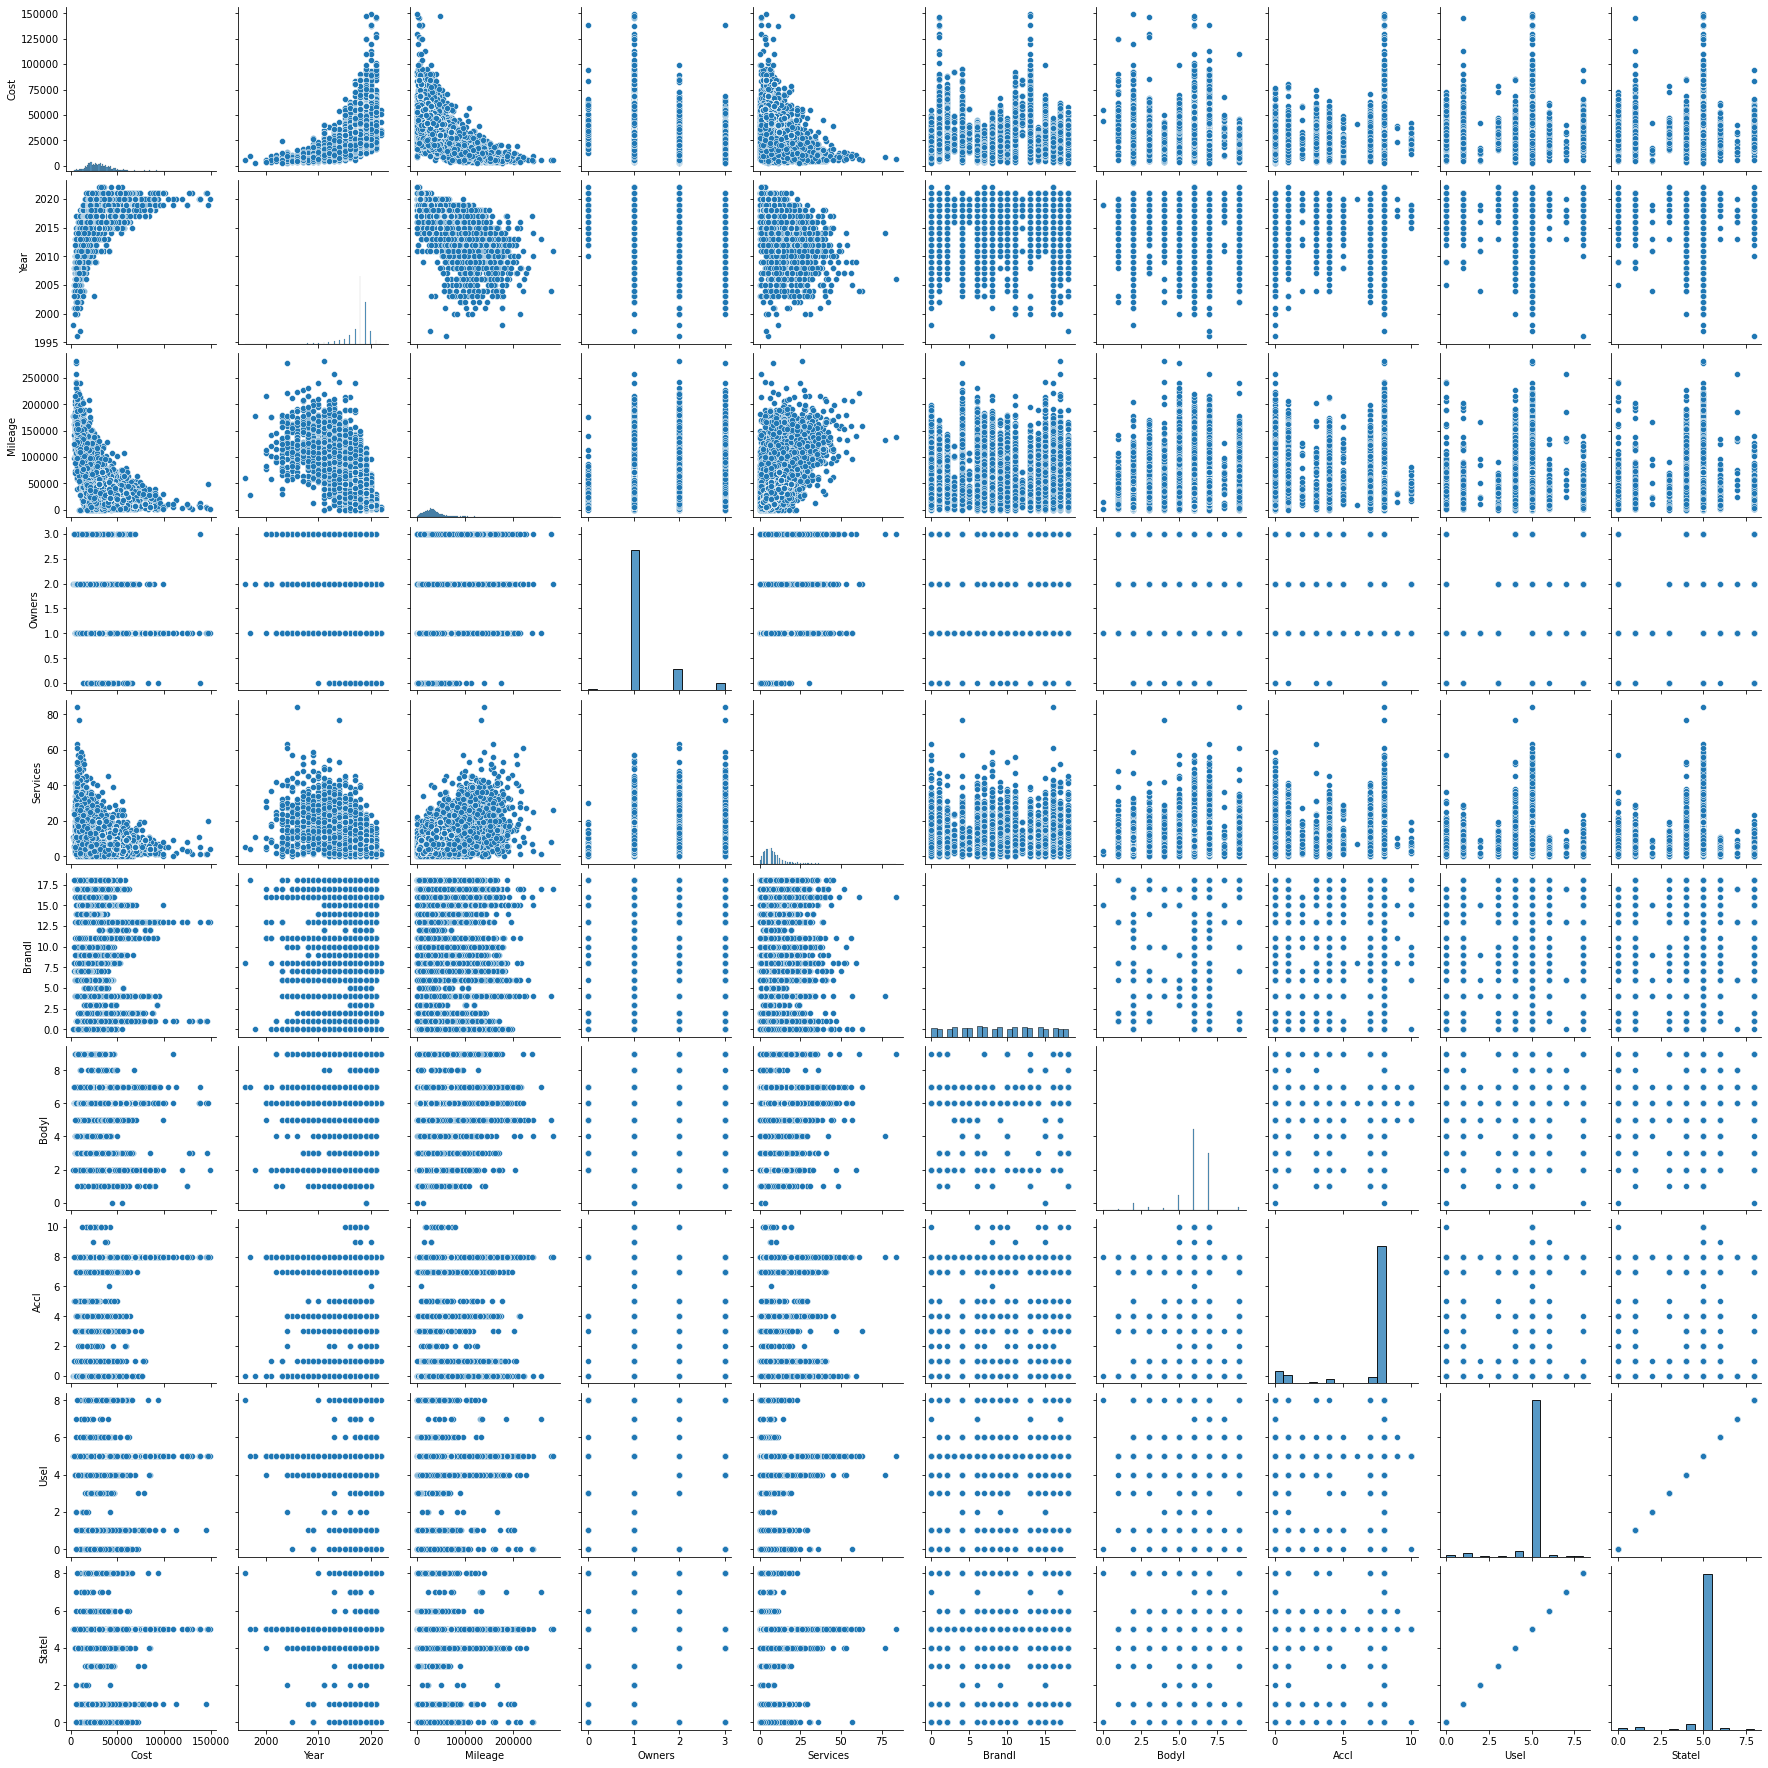

In [102]:
sns.pairplot(cdf)

In [101]:
cdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17860 entries, 0 to 21199
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Cost      17860 non-null  int64  
 1   Year      17860 non-null  float64
 2   Mileage   17860 non-null  float64
 3   Owners    17860 non-null  int64  
 4   Services  17860 non-null  int64  
 5   Brandl    17860 non-null  int64  
 6   Bodyl     17860 non-null  int64  
 7   Accl      17860 non-null  int64  
 8   Usel      17860 non-null  int64  
 9   Statel    17860 non-null  int64  
dtypes: float64(2), int64(8)
memory usage: 1.5 MB
